<a href="https://colab.research.google.com/github/nsspeer/data-analytics-portfolio/blob/main/_Titanic_Survivors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory Course 1.8.3 Activity

In [1]:
#Import all the libraries we will be using in this notebook.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#The total data is split into a training and test set. Training is used to "train" the model, and the test set 
#is used to test the accuracy of the model. We load them both here from the Github repository.
titanic_train = "https://raw.githubusercontent.com/HackerUSA-CE/intro-project/main/data/train.csv"
titanic_test = "https://raw.githubusercontent.com/HackerUSA-CE/intro-project/main/data/test.csv"

#We assign the data to a name so we can refer to it later.
train = pd.read_csv(titanic_train)
test = pd.read_csv(titanic_test)

#This line will show us the first 5 rows of the training data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,0


In [3]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age = dataset["Age"].copy()
    age[np.isnan(age)] = rand
    dataset["Age"] = age
    dataset["Age"] = train["Age"].astype(int)

#Fill in NaN with most common embarked values
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


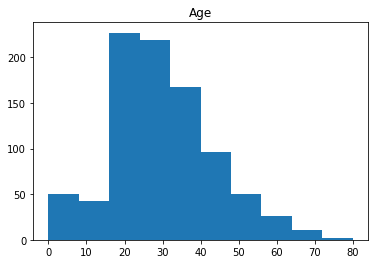

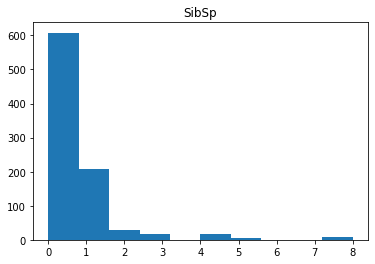

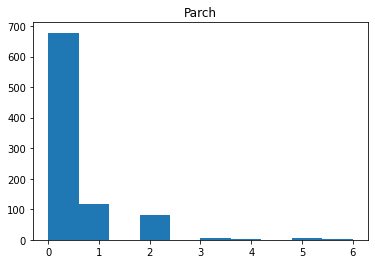

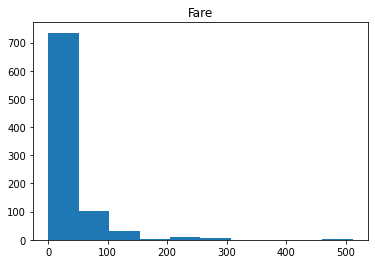

In [5]:
for i in train[['Age','SibSp','Parch','Fare']].columns:
    plt.hist(train[['Age','SibSp','Parch','Fare']][i])
    plt.title(i)
    plt.show()

In [6]:
#This shows us the averages for the survived (1) and not survived (0).
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,29.948998,21.690346,0.329690,0.553734
1,28.307018,47.991228,0.464912,0.473684


In [7]:
train = train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [8]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

accuracy = round(lr.score(X_train, Y_train) * 100, 2)
accuracy

79.46

In [9]:
train = train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train.head()

#Re-run the model with new train columns.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
